In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

Quantidade pontos usados no ajuste: 8
Grau de ajuste: 1

x0=1
y0=0.5
x1=2
y1=0.6
x2=3
y2=0.9
x3=4
y3=0.8
x4=5
y4=1.2
x5=6
y5=1.5
x6=7
y6=1.7
x7=8
y7=2
[[ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.]
 [ 1.  4.  9. 16. 25. 36. 49. 64.]]
[[ 0.5  1.2  2.7  3.2  6.   9.  11.9 16. ]]
A= [[  8.  36.]
 [ 36. 204.]]

b= [ 9.2 50.5]

det A:  336.0
c0= 0.17499999999999966
c1= 0.21666666666666673
Valores Preditos
[0.39166667 0.60833333 0.825      1.04166667 1.25833333 1.475
 1.69166667 1.90833333]
Resíduo
[ 0.10833333 -0.00833333  0.075      -0.24166667 -0.05833333  0.025
  0.00833333  0.09166667]
Sresid= 0.6166666666666669
SQresid= 0.08833333333333332
SQtotal= 2.0599999999999996
COF R2= 0.9571197411003236


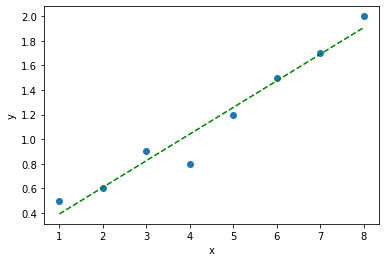

In [8]:
pontos = int(input('Quantidade pontos usados no ajuste: ')) # quantidade de pontos para o ajuste
grau = int(input('Grau de ajuste: ')) # define o grau do plinômio
print()
    
#Vetores X e Y
X, Y =np.zeros(pontos), np.zeros(pontos)
for i in range(pontos):
    X[i]=float(input('x'+str(i)+'='))
    Y[i]=float(input('y'+str(i)+'='))
        
# Vetores X´s
H = np.zeros(((2**grau)+1,pontos))
for i in range(len(H)):
    for j in range(len(H[0])):
        H[i][j]=pow(X[j],i)
print(H)

#vetores X´s x Y
XY = np.zeros((grau,pontos))
for i in range(len(XY)):
    for j in range(len(XY[0])):
        XY[i][j]=H[i+1][j]*Y[j]
print(XY)
# Sistema Ac=b
A=np.zeros((grau+1,grau+1))
b=np.zeros(grau+1)
for i in range(len(A)):
    for j in range(len(A)):
        A[i][j]=H[i].dot(H[j])
        b[i]=H[i].dot(Y)
print('A=',A)
print()
print('b=',b)
print()
print('det A: ', np.linalg.det(A))
#Resolvendo o sistema
c = np.linalg.solve(A,b)
for i in range(len(c)):
    print('c'+str(i)+'=',c[i])
    
# Encontrando os valores Preditos
yp =np.zeros(pontos)

for i in range(len(c)):
    yp+= c[i]*X**i

# Encontrando Erro
yresid = Y - yp # resíduo = valor real - valor predito
Sresid = sum(abs(yresid)) # somatória dos módulos do resíduos
SQresid = sum(pow(yresid,2)) # soma dos quadrados dos resíduos 
SQtotal = len(Y) * np.var(Y) # número de elementos do vetor y vezes a variância de y
R2 = 1 - SQresid/SQtotal # coeficiente de determinação
print('Valores Preditos')
print(yp)
print('Resíduo')
print(yresid)
print('Sresid=',Sresid)
print('SQresid=',SQresid)
print('SQtotal=',SQtotal)
print('COF R2=',R2)
#Printando o Gráfico
plt.plot(X,Y,'o')
plt.plot(X,yp,'g--')
plt.xlabel("x")
plt.ylabel("y")
plt.show()
    
    